# How the most frequent Stack Overflow tags evolved over time

In [1]:
%load_ext signature
%matplotlib inline

import itertools
import math

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ramiro')

df = pd.concat([
    pd.read_csv('data/stackoverflow/Aggregated post stats for top tags per day and tag 0 - 10.csv'),
    pd.read_csv('data/stackoverflow/Aggregated post stats for top tags per day and tag 10 - 20.csv')
])

chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: StackExchange - data.stackexchange.com/stackoverflow'
infosize = 13

In [2]:
df.describe()

,posts_per_day,views_per_day,answers_per_day,comments_per_day,favorites_per_day,score_per_day
count,51557.000000,51557.000000,51557.00000,51557.000000,51388.000000,51557.000000
mean,175.858467,268570.307349,312.94798,368.570611,93.543648,276.042904
std,172.309794,281340.899794,262.41651,416.106098,129.819946,300.838608
min,1.000000,25.000000,0.00000,0.000000,0.000000,-167.000000
25%,53.000000,69849.000000,124.00000,70.000000,30.000000,90.000000
50%,122.000000,180913.000000,235.00000,222.000000,62.000000,192.000000
75%,240.000000,360969.000000,416.00000,520.000000,119.000000,364.000000
max,1107.000000,4007177.000000,1599.00000,2493.000000,7461.000000,12759.000000


In [31]:
col_labels = ['Posts', 'Views', 'Answers', 'Comments', 'Favorites', 'Score']

df.dtypes

post_date            datetime64[ns]
posts_per_day                 int64
views_per_day                 int64
answers_per_day               int64
comments_per_day              int64
favorites_per_day           float64
score_per_day                 int64
tag_name                     object
dtype: object

In [2]:
df.post_date = pd.to_datetime(df.post_date)

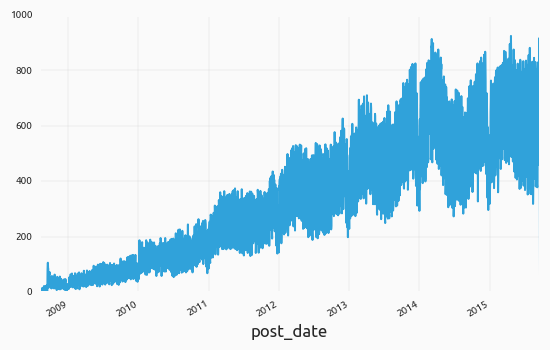

In [11]:
df[df.tag_name == 'java'].set_index('post_date').posts_per_day.plot()

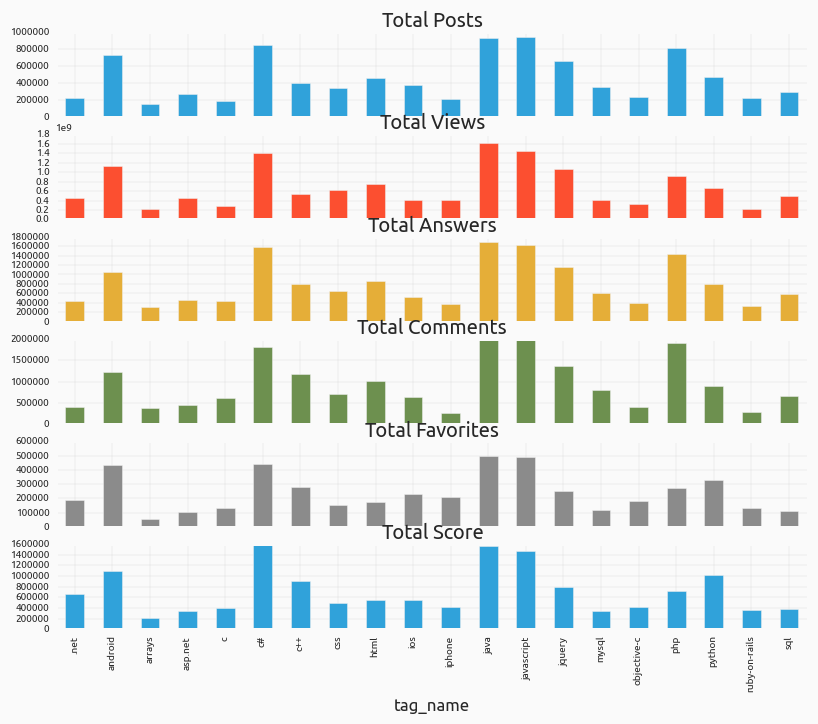

In [38]:
grouped_by_tag = df.groupby('tag_name').agg('sum')

grouped_by_tag.columns = ['Total {}'.format(l) for l in col_labels]

grouped_by_tag.plot(subplots=True, figsize=(12, 10), kind='bar', legend=False)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f726e1bab38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f726e4c7c88>], dtype=object)

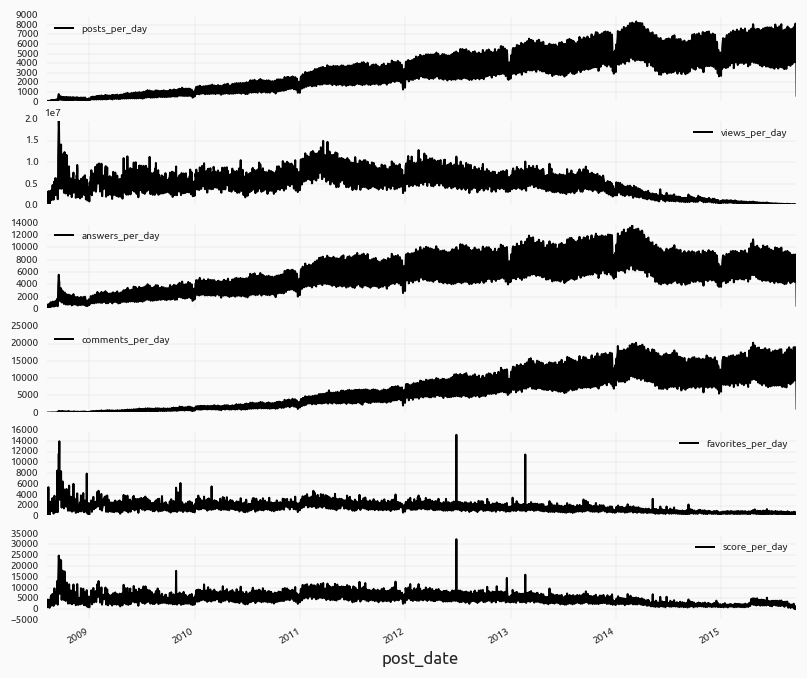

In [22]:
grouped_by_date = df.groupby('post_date').agg('sum')
grouped_by_date.plot(subplots=True, figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f726dfa9390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f726d1e8e48>]], dtype=object)

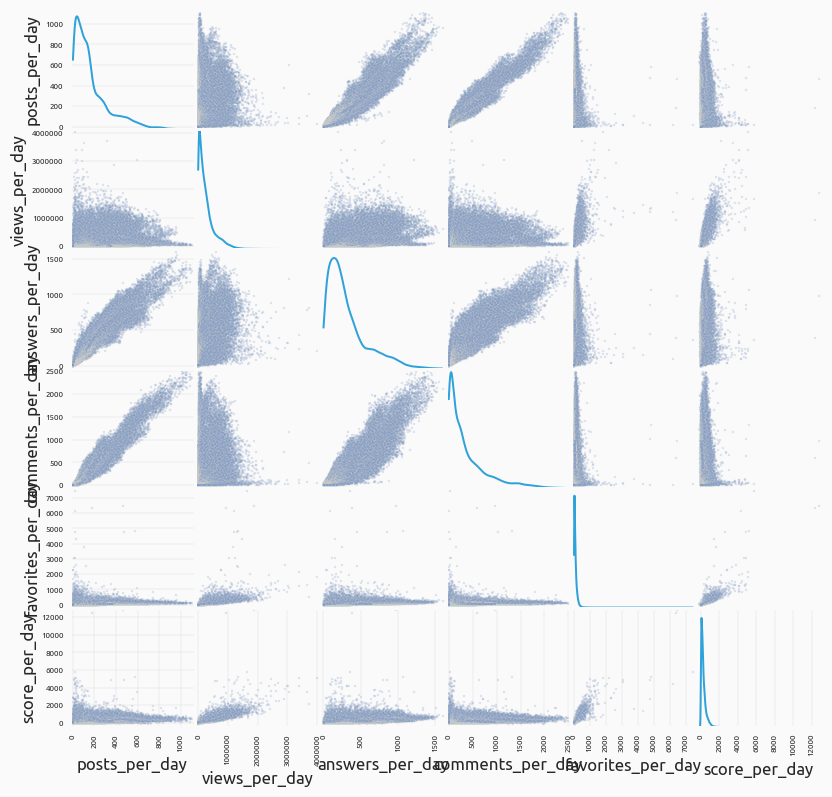

In [23]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')

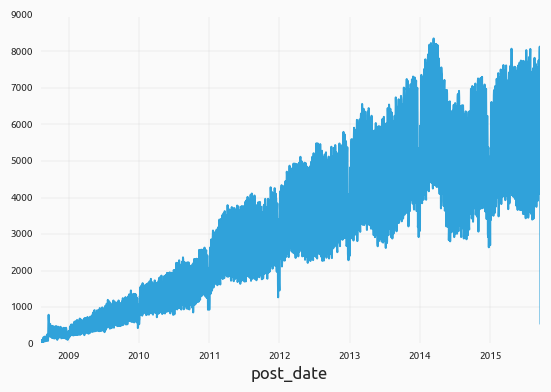

In [37]:
grouped_by_date.posts_per_day.plot()

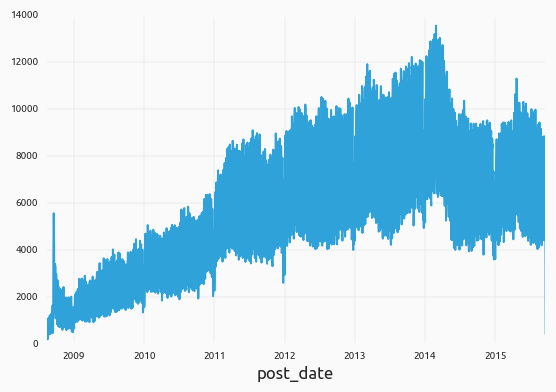

In [7]:
grouped_by_date.answers_per_day.plot()

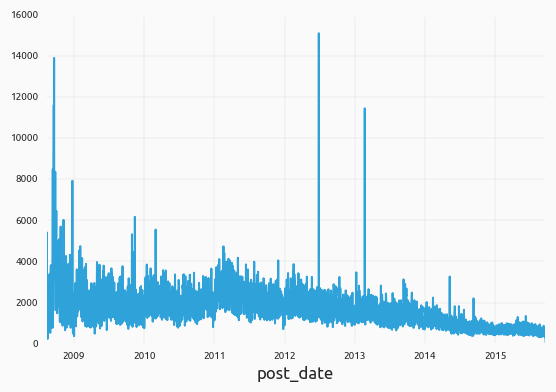

In [8]:
grouped_by_date.favorites_per_day.plot()

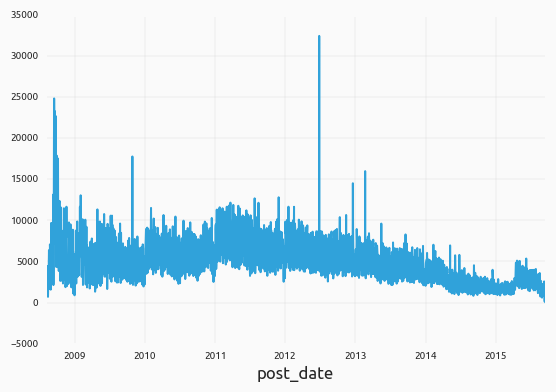

In [9]:
grouped_by_date.score_per_day.plot()

In [27]:
grouped_by_date.sort('score_per_day', ascending=False)

,posts_per_day,views_per_day,answers_per_day,comments_per_day,favorites_per_day,score_per_day
post_date,,,,,,
2012-06-27,5214,11280647,10032,11057,15108,32444
2008-09-17,789,19943689,5551,541,11612,24836
2008-09-19,608,12579414,4283,445,13906,23322
2008-09-25,539,14081757,3314,401,8364,22696
2008-09-18,702,17570614,4742,478,7987,21978
2008-09-16,697,15697724,4790,427,8102,19964
2008-09-30,485,11797414,2957,361,6429,17883
2009-10-29,1209,8997269,3750,1409,5322,17772
2008-09-23,539,13075094,3398,442,7069,17603


In [38]:
df.tag_name.value_counts()

c#               2608
.net             2608
php              2607
c++              2607
asp.net          2606
javascript       2605
python           2605
java             2605
sql              2605
c                2604
html             2603
mysql            2600
css              2598
ruby-on-rails    2596
jquery           2587
arrays           2585
iphone           2581
objective-c      2573
android          2440
ios              2334
dtype: int64